#

# Seaborn Learning

In [1]:
# Import seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Apply the default theme
sns.set_theme()

In [ ]:
# Load an example dataset
tips = sns.load_dataset("tips")

In [ ]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
dots = sns.load_dataset("dots")
sns.relplot(
    data = dots, kind = "line",
     x = "time", y = "firing_rate", col = "align",
     hue = "choice", size = "coherence", style = "choice",
     facet_kws = dict(sharex = False)
)

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data = fmri, kind = "line",
    x = "timepoint", y = "signal", col = "region",
    hue = "event", style = "event"
)

In [ ]:
sns.lmplot(data = tips, x = "total_bill", y = "tip", col = "time", hue = "smoker")

In [ ]:
# Distributional Representation
sns.displot(data = tips, x = "total_bill", col = "time", kde = True)

In [ ]:
sns.displot(data = tips, kind = "ecdf", x = "total_bill", col = "time", hue = "smoker", rug = True)

In [ ]:
# Plots Categorical Data
sns.catplot(data = tips, kind = "swarm", x = "day", y="total_bill", hue="smoker")

In [ ]:
sns.catplot(data = tips, kind = "violin", x = "day", y="total_bill", hue = "smoker", split = True)

In [ ]:
sns.catplot(data = tips, kind = "bar", x = "day", y = "total_bill", hue = "smoker")

In [ ]:
# Multivariate views on Complex datasets
penguins = sns.load_dataset("penguins")
sns.jointplot(data = penguins, x = "flipper_length_mm", y = "bill_length_mm", hue = "species")

In [ ]:
sns.pairplot(data = penguins, hue = "species")

In [ ]:
# Lower-level tools for building figures
g = sns.PairGrid(penguins, hue ="species", corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 5, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = "step", linewidth = 0, kde = True)
g.add_legend(frameon = True)
g.legend.set_bbox_to_anchor((.61, .6))

In [ ]:
# Opinionated Defaults and flexible customization
sns.relplot(
    data = penguins,
    x = "bill_length_mm",
    y = "bill_depth_mm",
    hue = "body_mass_g"
)

In [ ]:
sns.set_theme(style = "ticks", font_scale = 1.25)
g = sns.relplot(
    data = penguins,
    x = "bill_length_mm", y = "bill_depth_mm", hue = "body_mass_g",
    palette = "crest", marker = "x", s = 100
)
g.set_axis_labels("Bill length (mm) Bill depth (mm)", labelpad = 10)
g.legend.set_title("Body Mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim = True)

<Axes: >

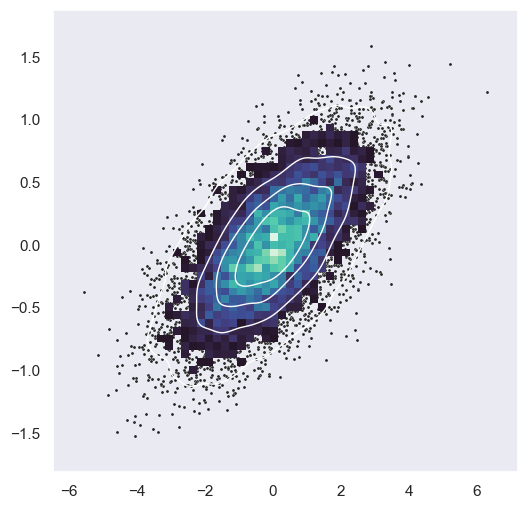

In [2]:
sns.set_theme(style = "dark")

# Stimulate data from a bivariate Gaussian

n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize = (6, 6))
sns.scatterplot(x=x, y=y, s=5, color =".15")
sns.histplot(x=x, y=y, bins = 50, pthresh = .1, cmap = "mako")
sns.kdeplot(x=x, y=y, levels = 5, color = "w", linewidths = 1)

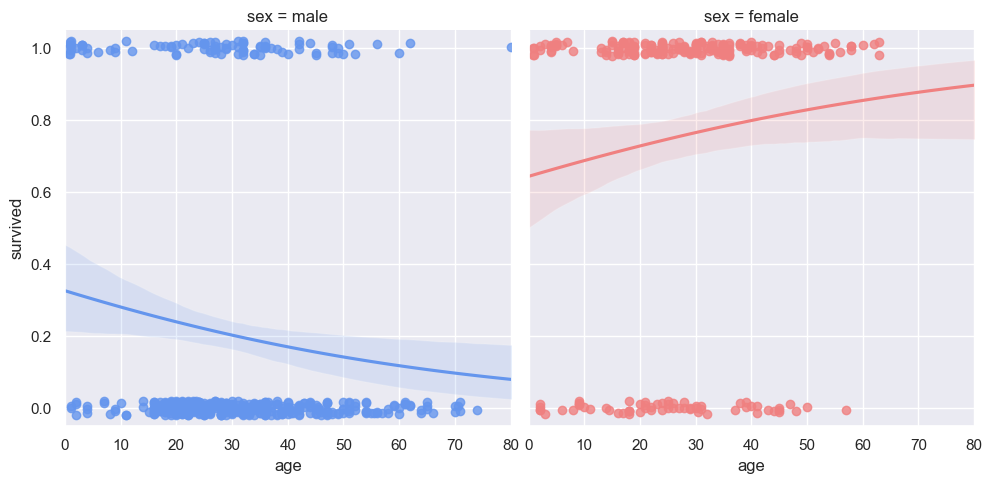

In [5]:
# Faceted logistic regression
sns.set_theme(style="darkgrid")

# Load the example  Titanic  dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male = "#6495ED", female = "#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x = "age", y = "survived", col = "sex", hue = "sex", data =df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))